## Background

Transjakarta is the first Bus Rapid Transit (BRT) transportation system in Southeast and South Asia, operating since 2004 in Jakarta, Indonesia. It is designed as a mass transportation mode to support the dense activities of the capital. With the world's longest route (251.2 km) and 287 stops distributed across 13 corridors, Transjakarta initially operated from 5:00 AM to 10:00 PM, but now it operates 24 hours a day.
## Problem Statement

Due to the company's plans for expansion and goals to be more efficient, they are in need of additional capital or profit to fund the growth, as well as the human capital needed for such improvements. They have tasked me with figuring out ways to achieve these goals through my recommendations and data analysis.

## Data

To figure out how we can solve this problem statement, we have been provided with a data set given by the company which elaborates on the different factors, consumer behavior and travel points of their Transjakarta product in the month of April at 2023. The dataset can be viewed in this [link](https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo).

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

This dataset contains information related to the demographic, travel route, and payment methods of the consumers. There are 22 columns in the Transjakarta dataset, namely:

1.) transID: Unique transaction ID for every transaction

2.) payCardID: Customer's main identifier, the card used for entrance and exit

3.) payCardBank: Name of the bank issuer for the customer's card

4.) payCardName: Customer's name embedded in the card

5.) payCardSex: Customer's gender embedded in the card

6.) payCardBirthDate: Customer's birth year

7.) corridorID: Corridor ID or Route ID serving as a key for route grouping

8.) corridorName: Corridor Name or Route Name containing the Start and Finish for each route

9.) direction: 0 for Go, 1 for Back, indicating the direction of the route

10.) tapInStops: Tap In (entrance) Stops ID for identifying stops by name

11.) tapInStopsName: Tap In (entrance) Stops Name where customers tap in

12.) tapInStopsLat: Latitude of Tap In Stops

13.) tapInStopsLon: Longitude of Tap In Stops

14.) stopStartSeq: Sequence of stops (1st stop, 2nd stop, etc.) related to the direction

15.) tapInTime: Time of tap in, including date and time

16.) tapOutStops: Tap Out (exit) Stops ID for identifying stops by name

17.) tapOutStopsName: Tap Out (exit) Stops Name where customers tap out

18.) tapOutStopsLat: Latitude of Tap Out Stops

19.) tapOutStopsLon: Longitude of Tap Out Stops

20.) stopEndSeq: Sequence of stops (1st stop, 2nd stop, etc.) related to the direction

21.) tapOutTime: Time of tap out, including date and time

22.) payAmount: The amount paid by customers, where some transactions may be free while others are not


To give a better overview on how the data looks, below you can view what the top 5 and bottom 5 rows from the dataset looks like:

In [153]:
file_path = '/Users/catalina/Downloads/Transjakarta.csv'
df = pd.read_csv(file_path)
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning

Before we dive into the data analysis, we need to first understand and clean the dataset. The reason for this is to ensure the quality and reliability of the data while identifying inconsistencies or anomalies, which include errors or missing values that can impact the accuracy of the interpretations. This process will help minimize the risk of drawing incorrect conclusions throughout our findings.

We need to familiarize ourselves with the data understanding process, and through this, we will, most importantly, identify missing values and determine the appropriate actions. Once done, we will continue with the data cleaning, justifying each of our actions with reference to domain knowledge and from a statistical point of view.

Firstly, let's examine the information from the Transjakarta dataset.


In [154]:
print(f'Total number of rows and columns in the dataset are {df.shape}')
df.info()

Total number of rows and columns in the dataset are (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611

In [155]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [156]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57T..."
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095..."
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, ..."
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 199..."
6,corridorID,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q..."
7,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
8,direction,2,"[1.0, 0.0]"
9,tapInStops,2570,"[P00142, B01963P, B00499P, B05587P, P00239, B0..."


## Data Understanding Summary

To summarize, we can observe that:

- The Transjakarta dataset has 22 columns and 37,900 rows.
- Several columns, such as 'corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', and 'payAmount,' contain missing data. The missing data is represented with 'NaN' or 'Not A Number.'
- The 'transID' contains a unique transaction id for every transaction, making it irrelevant for the analysis and can be deleted or disregarded, if we wish to.
- With 'tapInStopsName' and 'tapOutStopsName,' we can figure out the spots with the most commuting and hot travel points within the route within the specific time frame.

Let's investigate further and move to the cleaning process.

## Data Cleaning

We will now handle a big anomoly of our dataset which is the missing values.

In [157]:
# We first start by finding out the percentage of missing values in each column

df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

<Axes: >

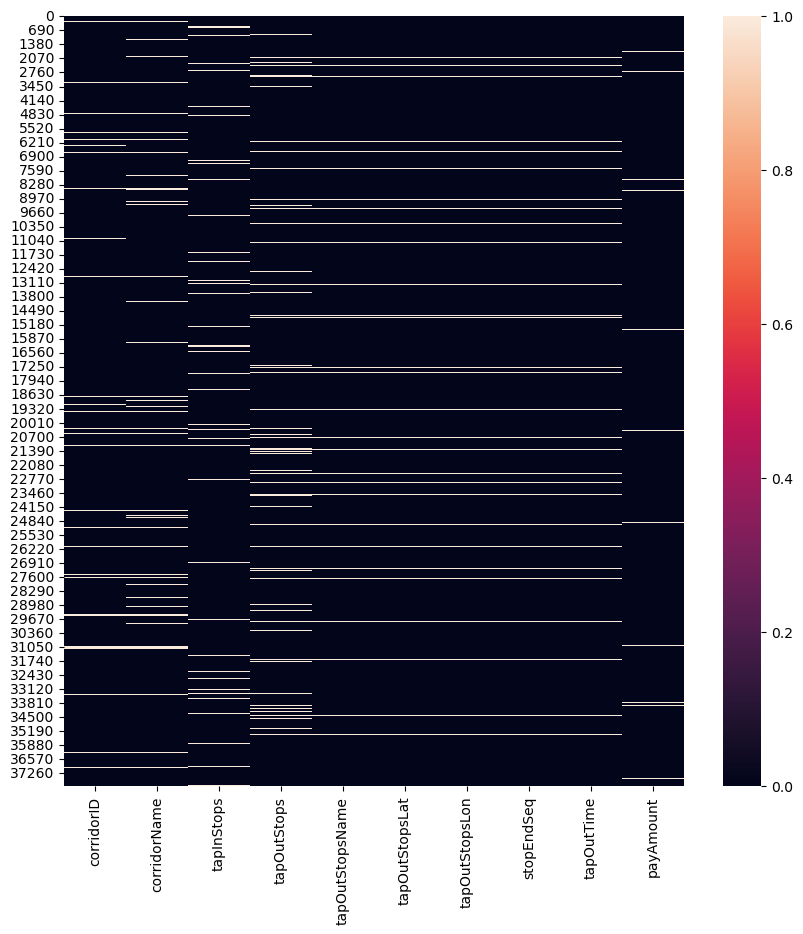

In [158]:
# let us show the distribution of the missing values in a data visualisation
# the heatmap below is only showing the columns with missing values that can be identified by the output above

plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna())

## Summary of Data Cleaning Missing Values

The missing values in all the columns have a relatively high proportion or less than 10%.

The column with the most missing values can be found in the 'tapOutStops'( about 6% ), and as 'tapOutStops' refers to Tap Out (Exit) Stops ID for identifying stops name, we can infer multiple things:
- Multiple commuters forget to tap out when they want to exit
- People purposelfully do not tap out 

There are 2 ways to handle missing values:
1.) Deleting the rows or columns with where 'missing values' can be found. This method can be done when the missing value is less than 30% of the data. 
2.) Inserting and updating data that is not found. This method is reccomended when you have more than 30% 

In our case, we will be doing the first method as our distribution of missing values is below 30%.

## Deleting the Missing Values and Irrelevant Columns 


In [159]:
df = df.dropna()
df = df.dropna(subset=['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount'])
df = df.dropna(axis=1)
df.dropna(inplace=True)

<Axes: >

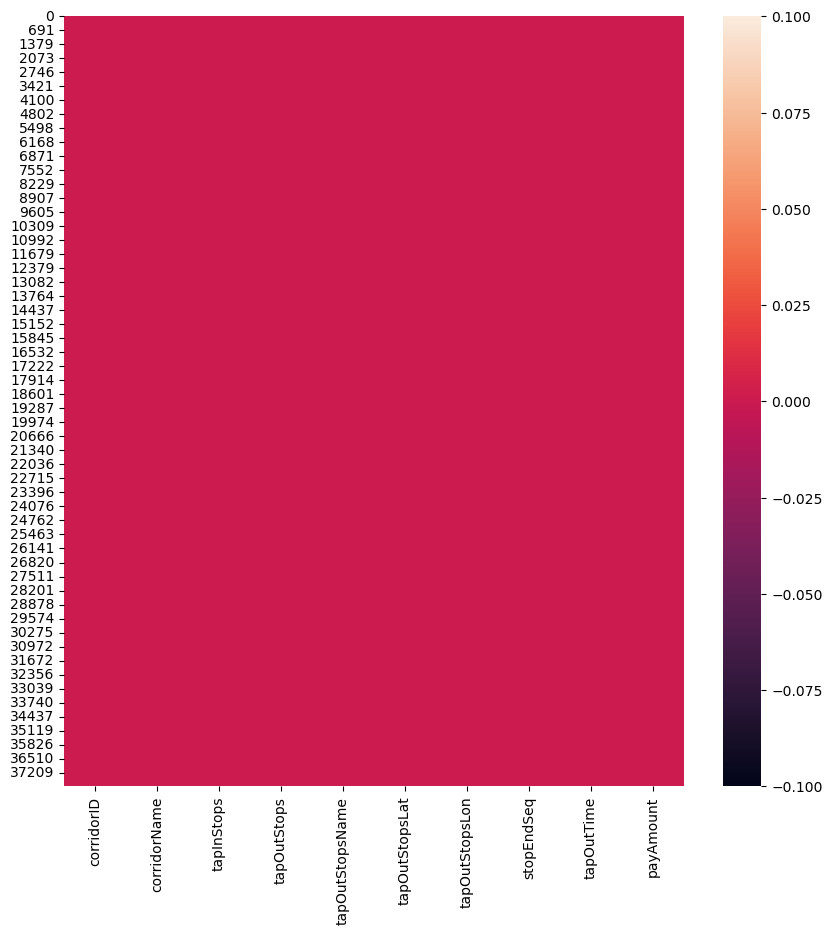

In [160]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna())

< As you can see in the heatmap above they are all a uniform colour meaning that all the missing value data has been deleted , but to be sure we will do another code that will double check the amount of missing values in the dataframe >

In [161]:
# I believe there are some columns that are not important to what I am finding, such as 'direction', hence I will delete it from the dataframe itself

columns_to_delete = ['direction']
df = df.drop(columns=columns_to_delete, axis=1)
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,tapInStops,tapInStopsName,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,P00142,Pal Putih,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,B01963P,Kemenkes 2,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,B00499P,Gg. Kunir II,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,B05587P,Taman Elok 1,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,P00239,Sunter Boulevard Barat,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


## Cleaned Data
As we finish the cleaning process, let us see the general overview of our cleaned dataframe:

In [162]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'missing values', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(31730, 21)


,dataFeatures,dataType,missing values,unique,uniqueSample
0,transID,object,0,31730,"[GBZO015C8Z74JY, TRZO272Z0V24YJ]"
1,payCardID,int64,0,1924,"[4164398783623350, 676367323901]"
2,payCardBank,object,0,6,"[emoney, dki]"
3,payCardName,object,0,1917,"[Padma Pudjiastuti, Karsana Budiman]"
4,payCardSex,object,0,2,"[M, F]"
5,payCardBirthDate,int64,0,66,"[2006, 1965]"
6,corridorID,object,0,216,"[5N, JAK.41]"
7,corridorName,object,0,211,"[Ciledug - Tendean, Joglo - Blok M]"
8,tapInStops,object,0,2429,"[P00079, B05413P]"
9,tapInStopsName,object,0,2428,"[Sbr. TPU Grogol Selatan, Yayasan Mambaul Ula]"


Before the cleaning, we had 37,900 rows of data and now we have 31,730 rows of data. Meaning after the cleanse, around 7,000 ( specifically 7,970) rows of data was deleted to get rid of any anomoly to provide a better and consie finding. 

Not to mention, we started with 22 columns but have now ended up with 21 because I deleted the 'Direction' column.


In [163]:
df.to_csv('cleaned_data_cap22.csv', index=False)

## Data Analysis

Now that we have completed the data cleaning phase we can start the analysis to find out major inisghts from the dataset to rech our goal.

Some of the major insights I would like to figure out are, major 'Tap-ins' and 'Tap-outs' stops, the hours with the most human activities, the ranking of payment methods used by consumers and the mostly rode 'CorridorID'.

In [164]:
# Find the most visited stops 'Tap-ins' and 'Tap-outs'
most_visited_stop_tapins = df['tapInStopsName'].value_counts().idxmax()
most_visited_stop_tapouts = df['tapOutStopsName'].value_counts().idxmax()

count_tapins = df['tapInStopsName'].value_counts().max()
count_tapouts = df['tapOutStopsName'].value_counts().max()

print("Most Visited Stop for Tap-ins:", most_visited_stop_tapins, "with", count_tapins, "occurrences")
print("Most Visited Stop for Tap-outs:", most_visited_stop_tapouts, "with", count_tapouts, "occurrences")

Most Visited Stop for Tap-ins: Penjaringan with 208 occurrences
Most Visited Stop for Tap-outs: BKN with 274 occurrences


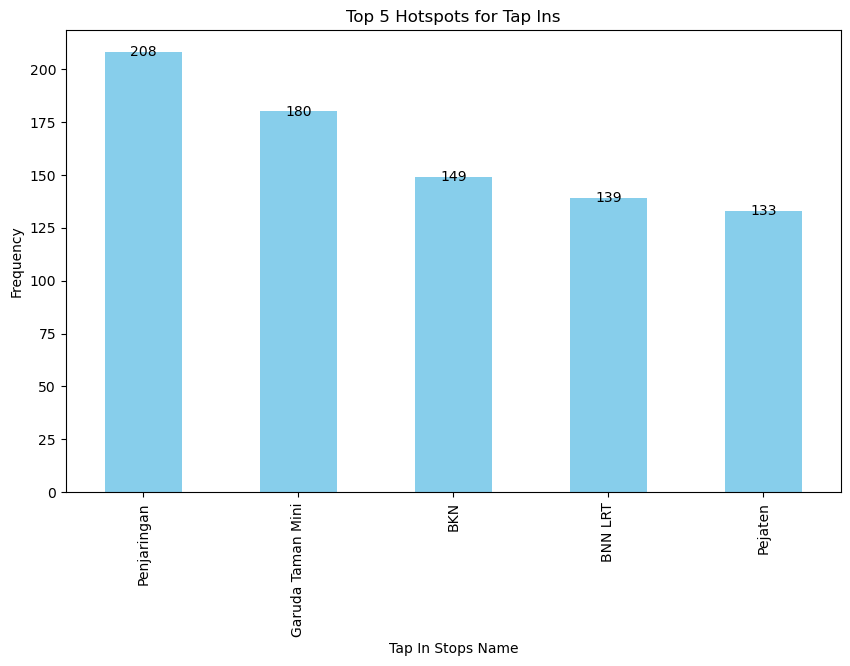

In [165]:
tapins_count = df['tapInStopsName'].value_counts()
top_tapins = tapins_count.head(5)

plt.figure(figsize=(10, 6))
top_tapins.plot(kind='bar', color='skyblue')
ax = plt.subplot()

plt.xlabel('Tap In Stops Name')
plt.ylabel('Frequency')
plt.title('Top 5 Hotspots for Tap Ins')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

plt.show()

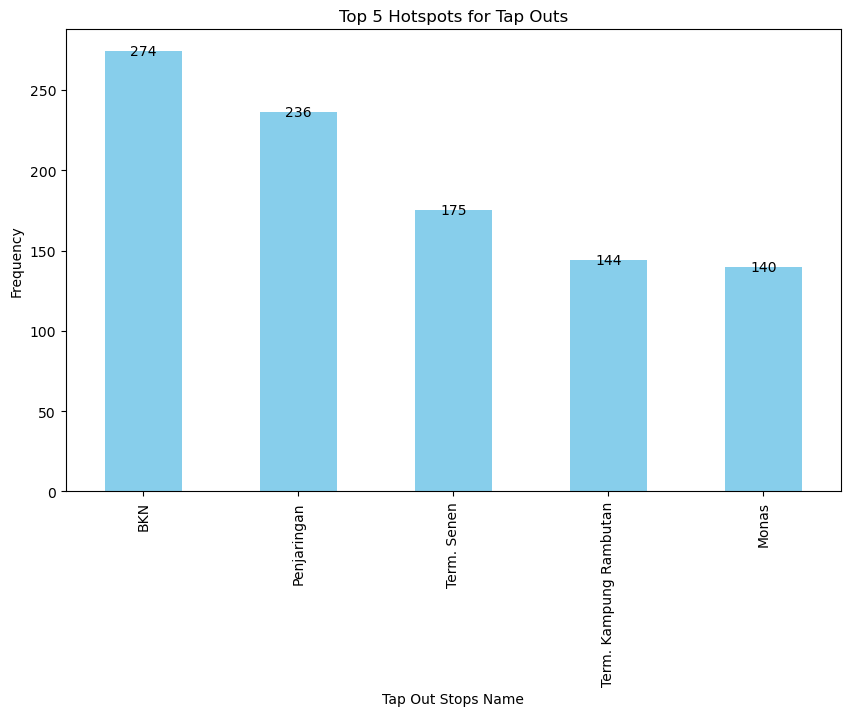

In [166]:
tapouts_count = df['tapOutStopsName'].value_counts()
top_tapouts = tapouts_count.head(5)

plt.figure(figsize=(10, 6))
top_tapouts.plot(kind='bar', color='skyblue')
ax = plt.subplot()

plt.xlabel('Tap Out Stops Name')
plt.ylabel('Frequency')
plt.title('Top 5 Hotspots for Tap Outs')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

plt.show()

In [167]:
# Find the most visited 'Corridor Name'
most_used_corridorName = df['corridorName'].value_counts().idxmax()
most_used_corridorID = df['corridorID'].value_counts().idxmax()
print("Most used Corridor Name [Corridor ID]:", most_used_corridorName,[most_used_corridorID])

Most used Corridor Name [Corridor ID]: Cibubur - Balai Kota ['1T']


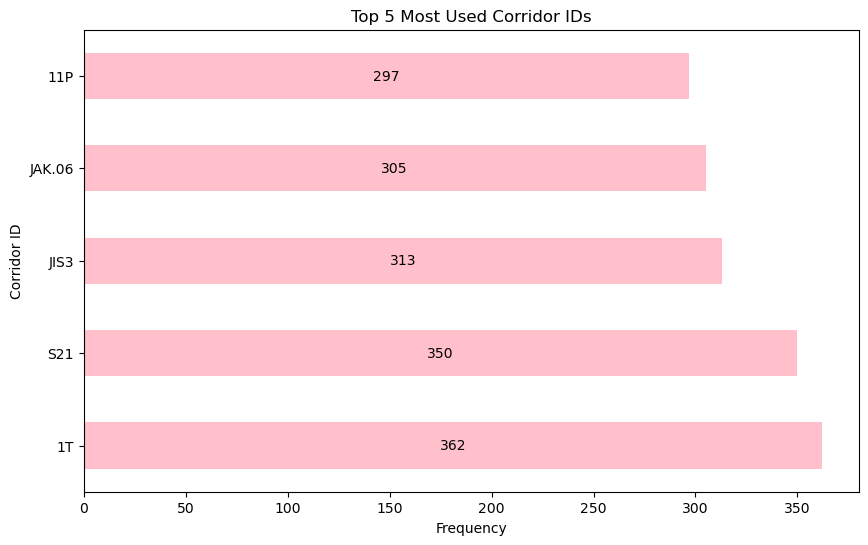

In [168]:
# here you can see the top 5 most used corridor ids in a barplot

corridor_counts = df['corridorID'].value_counts()
top_corridors = corridor_counts.head(5)

plt.figure(figsize=(10, 6))
ax = plt.subplot() 

top_corridors.plot(kind='barh', color='pink', ax=ax)

plt.xlabel('Frequency')
plt.ylabel('Corridor ID')
plt.title('Top 5 Most Used Corridor IDs')

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), ha='center', va='center')

plt.show()

In [169]:
# Find the hours of the day with the most human activity

df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

# Let us turn the time into specifically hours 
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour

# We will use value_counts() to count the occurrences of each hour
most_active_hour1 = df['tapInHour'].value_counts().idxmax()
most_active_hour2 = df['tapOutHour'].value_counts().idxmax()

# Display the most active hour for Ins and Outs
print("Most Active Hour for Transportation (In):", most_active_hour1)
print("Most Active Hour for Transportation (Out):", most_active_hour2)

Most Active Hour for Transportation (In): 6
Most Active Hour for Transportation (Out): 18


In [170]:
# Here we will try and find the route with the most common combination between the 'corridorID', 'tapInStopsName', and 'tapOutStopsName'
grouped_combinations = df.groupby(['corridorName', 'tapInStopsName', 'tapOutStopsName']).size()

# Find the index with the maximum occurrence
most_common_combination = grouped_combinations.idxmax()

# Display the most common combination
print("Most Common Combination of Corridor ID, Tap Ins, and Tap Outs:")
print(most_common_combination)

Most Common Combination of Corridor ID, Tap Ins, and Tap Outs:
('Rusun Kapuk Muara - Penjaringan', 'Rusun Kapuk Muara', 'Penjaringan')


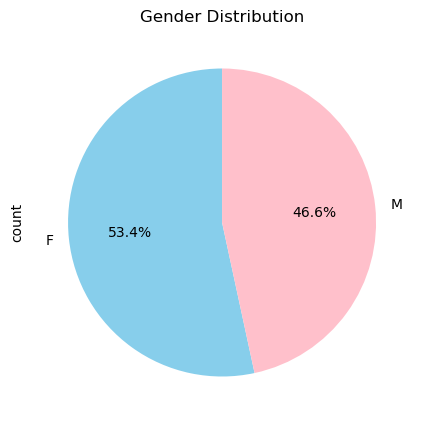

In [171]:
gender_counts = df['payCardSex'].value_counts()
plt.figure(figsize=(5, 5))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=90)

plt.title('Gender Distribution')
plt.show()

## Conclusions and Reccomendations

From the analysis conducted, we can draw the following conclusions regarding what we can do to find the funds for the company's expansions and find potential improvements points:

- The most visited stops for tap-ins is *'Penjaringan'* while for tap-outs it is *'BKN'*. Although out of 31,730 data points only *208 tap-in occurences were for Penjaringan* and *274 tap-out occurences were for BKN*, showing that the rate of occurences is relatively small compared to the total data points. This could be due to the large amount of stops that the Transjakarta transportation provide, but nontheless these 2 stops are the hotspots of tap-ins and outs.

- The gender demogrpahic of the consumers withing the dataframe can be seen through the piechart where * 53.4% of the total consumers are Female, while 46.6% are Male*.

- Based on the Tap In and Out Time, the most active hours for transportations the * 6th an 18th hour *, meaning 6am and 6pm are the busiest times the Transjakarta is used by consumers.

- The most used Corridor Name is *Cibubur - Balai Kota or Corridor ID ['1T'] *. Meaning that this corridor is the highly used travel route in our consumers day to day travels.

- However, the Most Common Combination of Corridor ID, Tap Ins, and Tap Outs is *('Rusun Kapuk Muara - Penjaringan', 'Rusun Kapuk Muara', 'Penjaringan')*. The reason this is the most common combination could be due tot he fact that it is free of charge and so there is a high level of demand for that travel route.



Recommendations:

1.) With the details of the major tap-in and tap-out hotspots, we can charge an increase in the prices for stops surrounding Penjaringan and BKN, to gain more profits.

2.) Speaking of raising prices, with the ('Rusun Kapuk Muara - Penjaringan', 'Rusun Kapuk Muara', 'Penjaringan') route combination being the most used or highly used travel route, we could start charging them instead of making it free. This could be a good opportunity to gain the funds we need.

3.) With the new knowledge of top travel routes as well as busiest hours ( being 6am and 6pm ) we can collaborate with sponsors or partners and use our buses or other transportation methods as means of marketing.

For example, as we know '1T' is the most used Corridor we can charge companies and provide them a marketing platforms for theirs ads and etc. During rush hours would be the most effective times for such marketing actions, hence, if we can find a way to sell this opportunity and show them that there is potential benefits from it we will eb able to gain traction and funds from 3rd party members.

I would suggest we do an A/B testing as it is commonly used in marketing and advertising to compare the performance of two or more variants. It allows you to isolate the impact of advertising on the '1T' corridor during rush hours by comparing it to a control group without advertising and we will use a random group and control groups to reduce bias.

4.) We could also push and focus more on the top 5 most used Corridor ID routes to alleviate passenger congestion and hopefully create a more efficient travel flow for our consumers, to gain more of their loyalty.

5.) As we have found out above, 53.4% of our consumers are women and that makes them more of the target market that we should focus on. I understand that Transjakarta has started their operations of the Female-only buses, and I believe that if we can do a few CSR activities that caters to female empowerment and improve our services to focus on the security of women in these buses, we can get more potential growth in our market size. 